# Handwritten digit classification

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the image dataset

In [2]:
from keras.datasets import mnist
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

In [3]:
xtrain

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
ytrain

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
xtest

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
ytest

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [7]:
xtrain.shape

(60000, 28, 28)

In [8]:
xtest.shape

(10000, 28, 28)

### Visualize top 9 images in the data

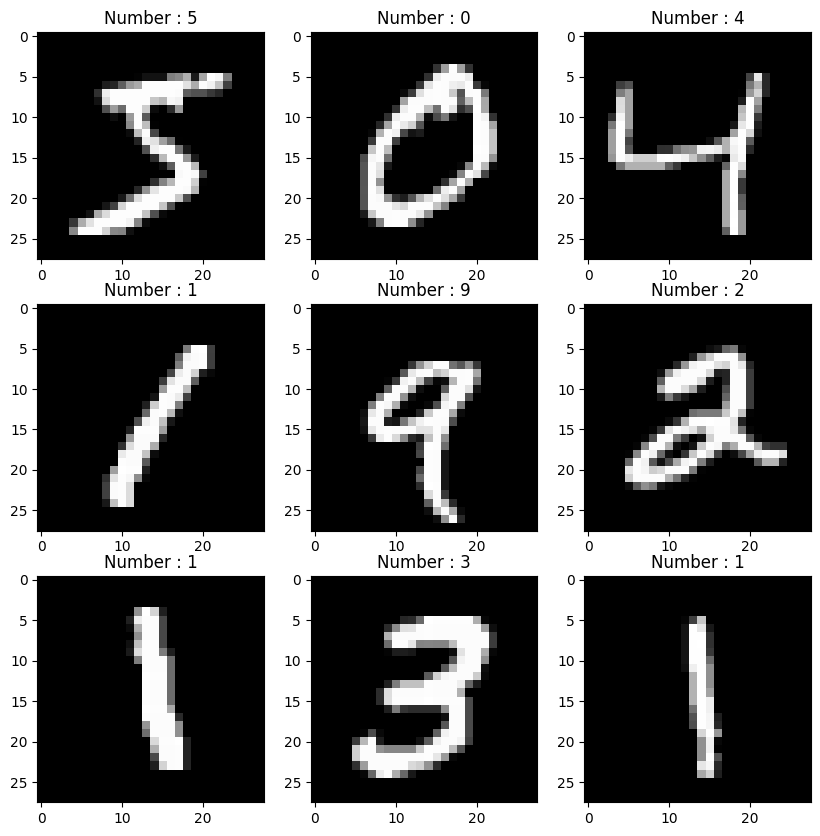

In [9]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10, 10))
x = 1
for i in range(9):
    plt.subplot(3,3,x)
    x=x+1
    plt.imshow(xtrain[i], cmap='gray')
    plt.title(f'Number : {ytrain[i]}')
plt.show()

### Preprocessing xtrain, xtest

In [10]:
xtrain_scl = xtrain/255
xtest_scl = xtest/255

### Preprocessing ytrain, ytest

In [11]:
from keras.utils import to_categorical
ytrain_cat = to_categorical(ytrain)
ytest_cat = to_categorical(ytest)

In [12]:
ytrain_cat[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [13]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

### Create a CNN neural network

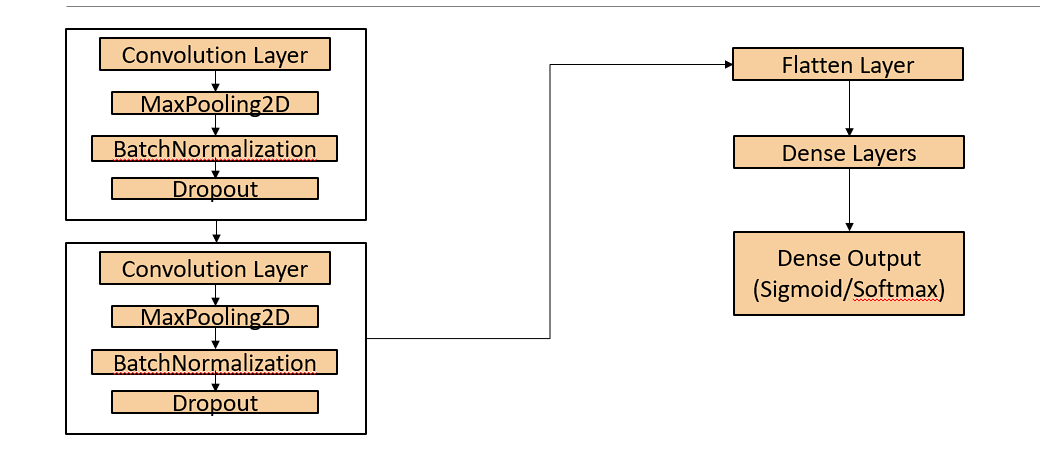

In [14]:
xtrain.shape

(60000, 28, 28)

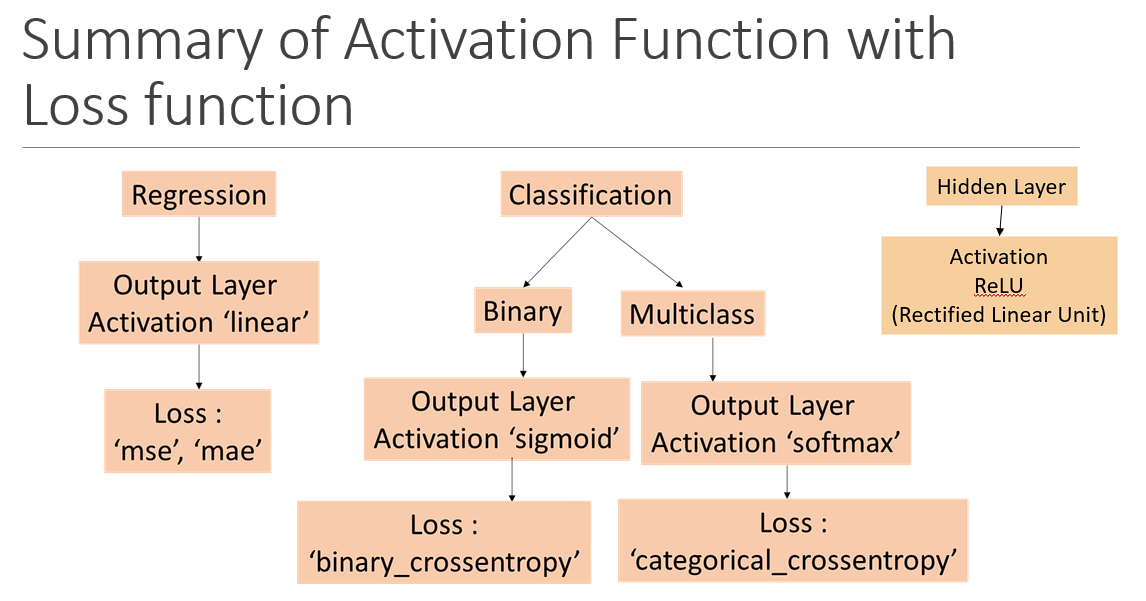

In [15]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, Dense

In [16]:
model = Sequential()

# First Convolution layer
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

# Second convolution layer
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

# Flatten layer
model.add(Flatten())

# Dense layer
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))

# Output layer 
model.add(Dense(10, activation='softmax'))

In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
hist = model.fit(xtrain_scl, ytrain_cat, validation_split=0.2, epochs=6)

Epoch 1/6


1500/1500 [==============================] - 12s 7ms/step - loss: 0.1493 - accuracy: 0.9534 - val_loss: 0.0737 - val_accuracy: 0.9785
Epoch 2/6
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0619 - accuracy: 0.9807 - val_loss: 0.0479 - val_accuracy: 0.9862
Epoch 3/6
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0454 - accuracy: 0.9856 - val_loss: 0.0472 - val_accuracy: 0.9872
Epoch 4/6
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0370 - accuracy: 0.9882 - val_loss: 0.0375 - val_accuracy: 0.9898
Epoch 5/6
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0329 - accuracy: 0.9899 - val_loss: 0.0419 - val_accuracy: 0.9883
Epoch 6/6
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0251 - accuracy: 0.9920 - val_loss: 0.0460 - val_accuracy: 0.9885


### Evaluate model in train and test

In [19]:
model.evaluate(xtrain_scl, ytrain_cat)

1875/1875 [==============================] - 7s 4ms/step - loss: 0.0226 - accuracy: 0.9935


[0.022556280717253685, 0.993483304977417]

In [20]:
model.evaluate(xtest_scl, ytest_cat)

313/313 [==============================] - 1s 4ms/step - loss: 0.0373 - accuracy: 0.9892


[0.037265367805957794, 0.9891999959945679]

### Get probabilities on train and test

In [23]:
yprob_tr = model.predict(xtrain_scl)
yprob_ts = model.predict(xtest_scl)

313/313 [==============================] - 1s 2ms/step


In [24]:
yprob_tr[0:5]

array([[4.96044095e-10, 5.16574172e-10, 2.61038391e-08, 7.63392355e-03,
        1.16329384e-10, 9.92358148e-01, 5.71483952e-07, 3.09176240e-10,
        3.65402320e-06, 3.60766580e-06],
       [1.00000000e+00, 8.85134847e-13, 7.69032782e-10, 7.80595207e-14,
        1.43195955e-10, 6.27683582e-12, 8.94334384e-09, 1.24701751e-11,
        2.75011350e-12, 1.25632056e-08],
       [7.09452787e-13, 6.83730583e-09, 3.23024466e-07, 3.42700911e-12,
        9.99998808e-01, 1.90478855e-09, 6.52135915e-11, 1.53279174e-07,
        1.62225788e-11, 6.16916225e-07],
       [6.35845487e-10, 9.99986410e-01, 3.63753628e-07, 8.65410243e-11,
        2.78042467e-06, 3.25147442e-09, 2.82986828e-10, 1.01736405e-05,
        3.21445242e-07, 3.04705150e-10],
       [4.81777079e-07, 2.37054625e-08, 8.34300522e-07, 6.64646279e-07,
        4.85052879e-04, 3.15514308e-06, 8.71656198e-07, 1.45191805e-07,
        9.08335642e-05, 9.99418020e-01]], dtype=float32)

In [25]:
yprob_ts[0:5]

array([[6.7484564e-12, 1.3018483e-08, 3.4602044e-07, 9.3161667e-08,
        2.2116895e-09, 1.7672326e-08, 7.5006416e-12, 9.9994946e-01,
        2.4155113e-08, 5.0010076e-05],
       [4.3809682e-12, 1.4278666e-09, 1.0000000e+00, 4.8862369e-14,
        6.4114333e-13, 1.6270208e-17, 2.8166114e-14, 5.7461006e-12,
        6.6826514e-12, 7.9526446e-13],
       [2.7587255e-09, 9.9994552e-01, 2.4091008e-07, 7.3760703e-10,
        3.6421497e-05, 5.5377935e-08, 2.0130877e-08, 2.3279399e-06,
        1.5376996e-05, 8.8621839e-09],
       [9.9996722e-01, 4.4295956e-10, 3.4811176e-09, 3.5970089e-09,
        2.9252287e-09, 3.3321587e-08, 3.2579119e-05, 7.1256174e-09,
        2.2678910e-09, 1.7744833e-07],
       [4.5376651e-16, 7.7387445e-12, 8.2266909e-11, 1.6416241e-14,
        1.0000000e+00, 3.4410352e-13, 4.4728830e-12, 1.6353380e-12,
        9.2018615e-12, 2.3745882e-08]], dtype=float32)

### Getting actual number predictions

In [26]:
import numpy as np 
ypred_tr = np.argmax(yprob_tr, axis=1)
ypred_ts = np.argmax(yprob_ts, axis=1)

In [27]:
ypred_tr[0:5]

array([5, 0, 4, 1, 9], dtype=int64)

In [29]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [30]:
ypred_ts[0:5]

array([7, 2, 1, 0, 4], dtype=int64)

In [31]:
ytest[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

### Plot confusion matrix

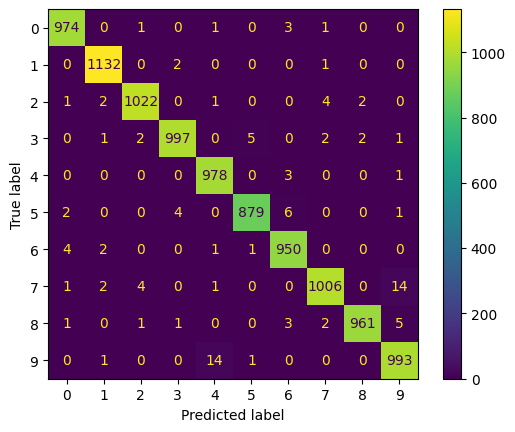

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf)
cfd.plot()

In [33]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       0.98      0.99      0.99       958
           7       0.99      0.98      0.98      1028
           8       1.00      0.99      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### Save the keras model

In [34]:
model.save('Handwrittenmodel.keras')

### Load the keras model

In [35]:
from keras.models import load_model
nn = load_model('Handwrittenmodel.keras')
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 13, 13, 16)        64        
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 13, 13, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0